In [ ]:
import numpy as np
from scipy.sparse import lil_matrix
import matplotlib.pyplot as plt
import itertools
import operator as op
from functools import reduce
import time

In [ ]:
def ncr(n, r):
    r = min(r, n-r)
    numer = reduce(op.mul, range(n, n-r, -1), 1)
    denom = reduce(op.mul, range(1, r+1), 1)
    return numer // denom  # or / in Python 2

In [ ]:
def Complete_Hamiltonian(H,n):
  k=4**n #total no. of states

  for i in range(k):
    key=bin(i)[2:]
    key=(2*n-len(key))*'0' + key #Appending additional zeros in the beginning

    key=[x for x in key]

    #Calculate Self-interaction energies
    for j in range(0,2*n,2):
      if key[j]=='1' and key[j+1]=='1':
        H[i,i]+=U
    
    #Calculate Hopping energies
    for j in range(2*n):
      if key[j]=='1':
        #Hopp right
        new_key=key.copy()
        new_key[j]='0'
        if j+2<2*n and key[j+2]=='0':
          new_key[j+2]='1'
          str1=""
          new_key=str1.join(new_key)
          H[i,int(new_key,2)]=t

        #Hopp left
        new_key=key.copy()
        new_key[j]='0'
        if j-2>=0 and key[j-2]=='0':
          new_key[j-2]='1'
          str1=""
          new_key=str1.join(new_key)
          H[i,int(new_key,2)]=t

  #plt.imshow(H)
  #plt.show()
  return H

In [ ]:
def Hubbard(t,U,n,m):
  k=4**n #total no. of states
  H = lil_matrix((k,k))

  tm=time.time()
  H=Complete_Hamiltonian(H,n)
  print(time.time()-tm)

  new_H=np.zeros((ncr(2*n, m),ncr(2*n, m)))
  #print(np.shape(new_H))

  coin=[]

  for i in range(k):
    key=bin(i)[2:]
    key=[int(x) for x in key]
    if sum(key)==m: coin.append(i)
  #print(coin)

  tm=time.time()
  i0=0
  for i in coin:
    j0=0
    for j in coin:
      new_H[i0,j0]=H[i,j]
      j0+=1
    i0+=1
  print(time.time()-tm)

  tm=time.time()
  l,v=np.linalg.eigh(new_H)
  print(time.time()-tm)

  print(l[:5])
  gs=np.abs(v[:,0])

  plt.spy(new_H)
  plt.show()
  
  plt.plot(v[:,0])
  plt.show()

  '''
  plt.imshow(new_H)
  plt.show()
  
  plt.plot(l)
  plt.show()
  
  plt.figure(figsize=(10,6))
  plt.bar(np.arange(len(l)),gs**2)
  plt.show()

  #Most stable configurations
  
  print("Most stable configurations:")
  bin(coin[np.argmax(np.abs(v[:,0]))])

  keys=np.argsort(np.abs(v[:,0]))

  for i in range(-1,-5,-1):
    temp=bin(coin[keys[i]])[2:]
    temp=(2*n-len(temp))*'0' + temp
    print(temp)
  '''

  def magnetization(gs,coin):
    l=len(gs)
    net_mag=0
    for i in range(l):
      state_mag=0
      temp=bin(coin[i])[2:]
      temp=(2*n-len(temp))*'0' + temp

      for j in range(2*n):
        if j%2==0 and temp[j]=='1': state_mag+=1
        elif j%2==1 and temp[j]=='1': state_mag-=1
      #print(temp, state_mag, round(gs[i]**2,2))
      net_mag+=(gs[i]**2)*state_mag
    return net_mag

  return magnetization(gs,coin)

In [ ]:
t=-1
U=1
n=9 #no. of sites
m=3 #no. of electrons

15.733402967453003
1.9776825904846191
0.2315046787261963
[-5.22153745 -5.22153745 -4.95716241 -4.95716241 -4.77267177]


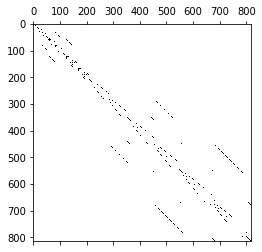

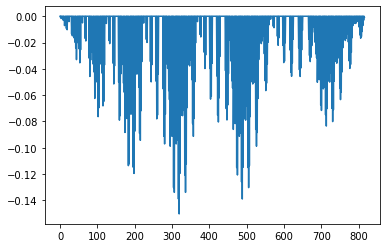

0.9999999999999986

In [ ]:
Hubbard(t,U,n,m)

In [ ]:
'''
M=np.arange(1,2*n)
mag=np.zeros(len(M))
for i in range(len(M)):
  mag[i]=Hubbard(t,U,n,M[i])
  print(t,M[i],np.round(mag[i],4))
'''

'\nM=np.arange(1,2*n)\nmag=np.zeros(len(M))\nfor i in range(len(M)):\n  mag[i]=Hubbard(t,U,n,M[i])\n  print(t,M[i],np.round(mag[i],4))\n'

In [ ]:
'''
plt.imshow(mag,extent=(0,2,-0.05,-0.3),aspect=6)
plt.colorbar()
'''

'\nplt.imshow(mag,extent=(0,2,-0.05,-0.3),aspect=6)\nplt.colorbar()\n'